<a href="https://colab.research.google.com/github/jacksonhoward1856/CSM_GP_DIGSIG/blob/master/Supervised_Regression/Supervised_Regression_Final_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Regression First Pass
###Jackson Howard
### 2/14/2025

This dataset was a pre-developed code from Penn Machine Learning Benchmarks, which I ended up using after my initial dataset using airborne EM data for determining subsurface targets was giving me too many problems for the scale of this project.

The data are in the context of CPU performance as the target, with several parameters being given in the data. The goal of this EDA is to determine and parts of the data that are of interest for supervised regression, and that could give use some information on how these features are similar or not.

Github Repo for PMLB: https://github.com/EpistasisLab/pmlb/tree/master

## EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/jacksonhoward1856/GEOL558/main/Supervised_Regression/197_cpu_act.tsv"
df = pd.read_csv(url, sep='\t')

# Display basic information
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (8192, 22)


lread  lwrite   scall  sread  swrite  fork  exec     rchar     wchar  \
0    6.0     2.0  1036.0  103.0   114.0  1.00  1.00  172076.0  355965.0   
1    1.0     0.0  2165.0  205.0   101.0  0.40  1.20   43107.0   44139.0   
2   62.0    77.0  3806.0  258.0   166.0  1.40  1.40  492142.0  268706.0   
3    5.0     0.0  4721.0  256.0   177.0  0.99  2.58  524787.0  174964.0   
4   42.0    55.0  3949.0  249.0   244.0  2.60  4.60  197289.0  529200.0   

   pgout  ...      pgscan  atch       pgin      ppgin        pflt        vflt  \
0   0.00  ...    0.000000  0.00   2.000000   4.000000   73.599998   89.000000   
1   4.80  ...  181.399994  0.20  85.400002  88.199997   19.400000  161.800003   
2   4.80  ...   79.199997  2.20   7.600000  12.200000   68.000000  218.800003   
3  14.51  ...  189.860001  1.99   4.170000  24.850000   95.629997  248.910004   
4   4.20  ...    0.000000  1.40   1.800000   2.200000  219.600006  297.200012   

   runqsz  freemem   freeswap  target  
0     2.0   6527.0  1851864.0    90.0  
1     3.0    130.0  1131931.0    88.0  
2     5.2    256.0  1314590.0    85.0  
3     1.0    233.0   972606.0    81.0  
4     3.4    331.0  1013805.0    79.0  

[5 rows x 22 columns]

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Summary Statistics:


lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.192000e+03  8.192000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.970137e+05  9.589829e+04     2.285317  ...   
std       2.479493     5.212456  2.394808e+05  1.407569e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.386425e+04  2.293550e+04     0.000000  ...   
50%       0.800000     1.200000  1.247795e+05  4.662000e+04     0.000000  ...   
75%       2.200000     2.800000  2.676692e+05  1.061480e+05     2.400000  ...   
max      20.120001    59.560001  2.526649e+06  1.801623e+06    81.440002  ...   

            pgscan         atch         pgin        ppgin         pflt  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     21.526849     1.127505     8.277960    12.388586   109.793799   
std      71.141340     5.708347    13.874978    22.281318   114.419221   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.600000     0.600000    25.000000   
50%       0.000000     0.000000     2.800000     3.800000    63.799999   
75%       0.000000     0.600000     9.765000    13.800000   159.600006   
max    1237.000000   211.580002   141.199997   292.609985   899.799988   

              vflt       runqsz       freemem      freeswap       target  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    185.315796    19.630676   1763.456299  1.328126e+06    83.968872  
std     191.000603   125.742085   2482.104511  4.220194e+05    18.401905  
min       0.200000     1.000000     55.000000  2.000000e+00     0.000000  
25%      45.400002     1.200000    231.000000  1.042624e+06    81.000000  
50%     120.400002     2.000000    579.000000  1.289290e+06    89.000000  
75%     251.800003     3.000000   2002.250000  1.730380e+06    94.000000  
max    1365.000000  2823.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 22 columns]


Missing Values:


lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
target      0
dtype: int64

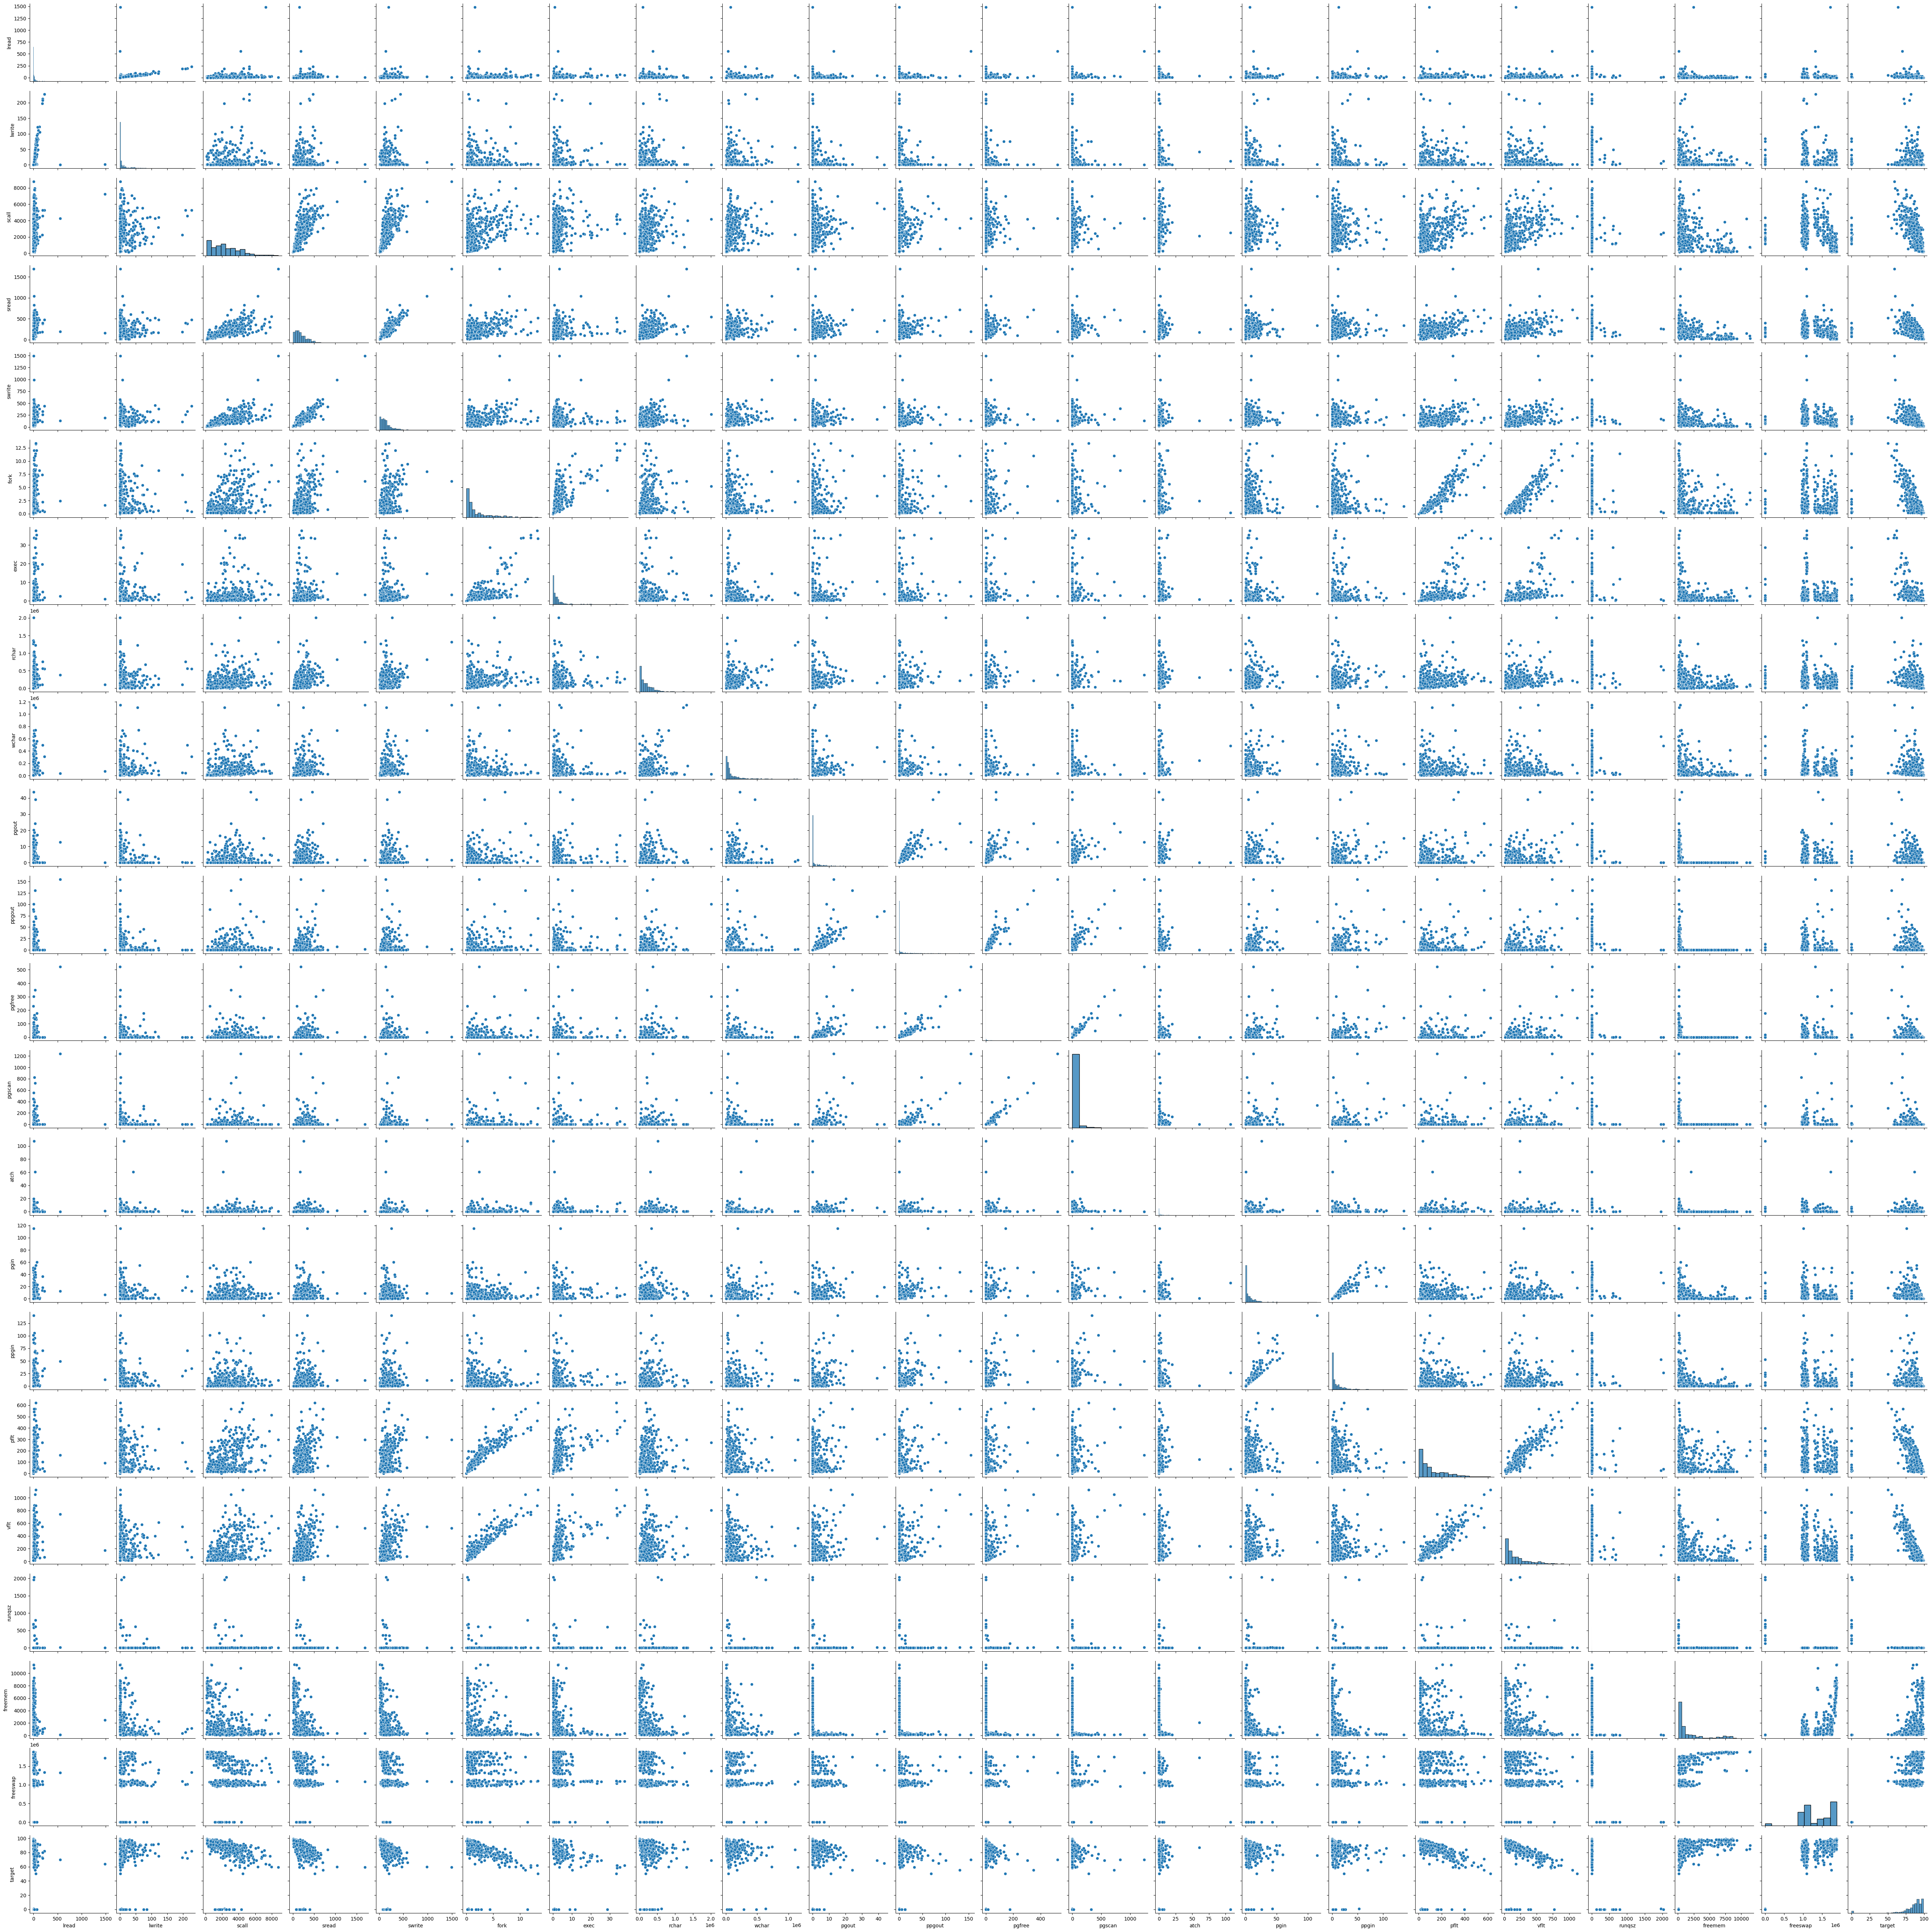

In [ ]:
# Seaborn Pair Plot (Sampling for efficiency)
sns.pairplot(df.sample(n=500, random_state=42))
plt.show()

This pairplot helps visualize relationships between features and the target variable. Strong correlations indicate predictive potential, which I used for further analysis and training.

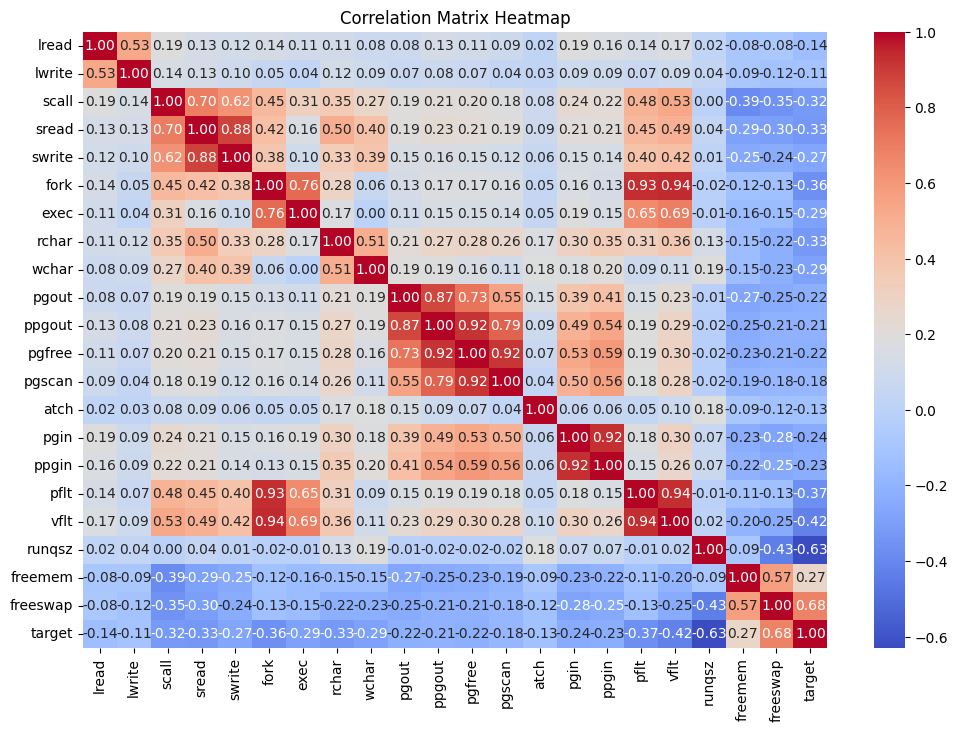

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

This heatmap shows feature correlations. High correlations suggest redundant features that might be removed to prevent multicollinearity.

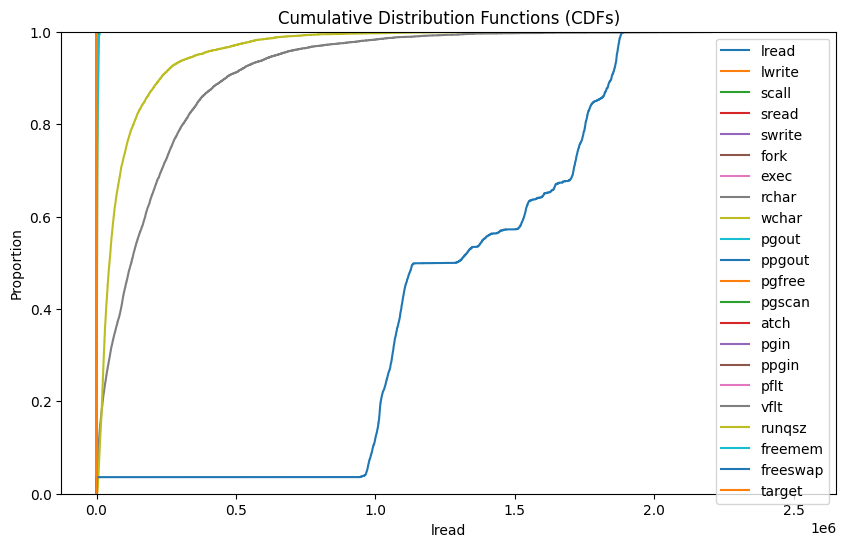

In [ ]:
# CDF Plot for selected variables
plt.figure(figsize=(10,6))
for column in df.columns[:22]:  # Limiting to first 5 features for clarity
    sns.ecdfplot(df[column], label=column)
plt.legend()
plt.title("Cumulative Distribution Functions (CDFs)")
plt.show()

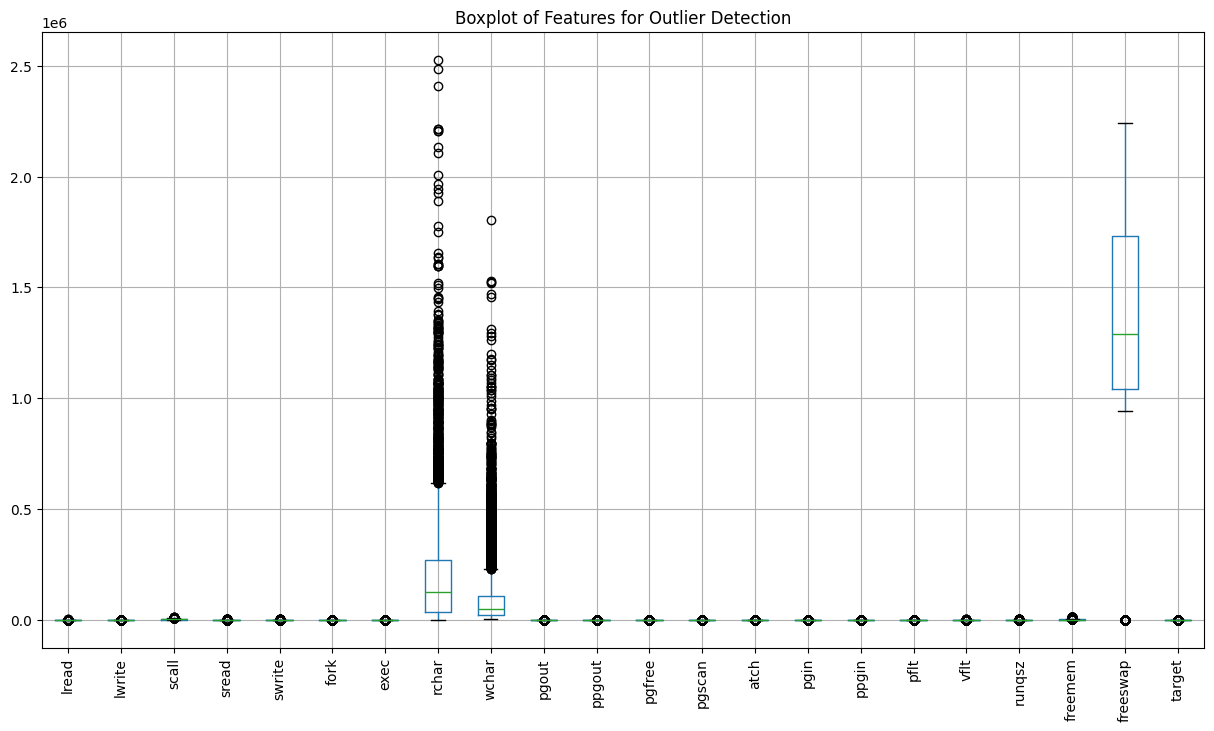

In [ ]:
# Outlier Detection using Boxplots
plt.figure(figsize=(15,8))
df.boxplot(rot=90)
plt.title("Boxplot of Features for Outlier Detection")
plt.show()

Boxplots help identify outliers, while CDFs reveal feature distributions. I can see highly skewed features that may need to be addressed before training.

## Target Picking, Data Splitting

In [ ]:
# Define the target variable
target_column = 'target'

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Display the shapes of the resulting datasets
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Feature Selection using Feature Importance from Gradient Boosting
feature_selector = GradientBoostingRegressor(n_estimators=100, random_state=42)
feature_selector.fit(X, y)
feature_importances = feature_selector.feature_importances_
selected_features = X.columns[np.argsort(feature_importances)[-10:]]  # Select top 10 features
X_selected = X[selected_features]
print("Selected Features:", selected_features)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print first 5 rows of training features
print("First 5 rows of training features:")
print(pd.DataFrame(X_train, columns=selected_features).head())

Features shape: (8192, 21)
Target shape: (8192,)
Selected Features: Index(['ppgin', 'sread', 'exec', 'swrite', 'pflt', 'freemem', 'scall', 'vflt',
       'freeswap', 'runqsz'],
      dtype='object')
First 5 rows of training features:
      ppgin     sread      exec    swrite      pflt   freemem     scall  \
0 -0.107208  0.007640 -0.113581 -0.037753 -0.650226  0.044539  0.667077   
1 -0.556042  2.998070 -0.497300  2.810146 -0.814544 -0.233871  0.441796   
2 -0.232881  0.158418 -0.228697  0.230211 -0.288376 -0.498179  1.798378   
3 -0.035394 -0.972418 -0.113581 -0.804256 -0.076861  2.426131 -1.160268   
4 -0.376508 -0.163242  0.078279 -0.025290  0.234295 -0.399466 -0.385866   

       vflt  freeswap    runqsz  
0 -0.750388  0.486451 -0.124315  
1 -0.865578  0.927204 -0.138631  
2  0.040234 -0.832892 -0.148175  
3 -0.235175  1.305413 -0.146584  
4 -0.092758 -0.526960 -0.148175  


The target variable in this dataset is CPU usage, which represents the system's processing load. This variable is selected because the goal is to understand how various system performance metrics influence CPU activity. The target was split from the rest of the data, so that the models learn patterns in CPU usage based on the provided input features while preventing data leakage.

To properly train the models, the dataset is divided into training (80%) and testing (20%) subsets using train_test_split. The training data is used to fit the models, allowing them to learn from past patterns, while the testing data looks at the models' ability to generalize to unseen examples. The split is performed with a fixed random state (42), meaning that every time the code runs, the dataset is split in the same way. This prevents variations in results due to random partitioning, providing a consistent benchmark for evaluating model performance.

## Hyperparameters, Tuning for Each Model

###Models used: Linear Regression, Decision Tree, Gradient Boosting, SVR

In [ ]:
# Initialize models with hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
}

# Hyperparameter tuning for Gradient Boosting, Decision Tree, and SVR
param_grids = {
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 4, 5]
    },
    "Decision Tree Regressor": {
        "max_depth": [3, 5, 7],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Regression": {
        "C": [1, 10, 100],
        "gamma": [0.01, 0.1, 1],
        "epsilon": [0.01, 0.1, 1]
    }
}

best_models = {}
for model_name, param_grid in param_grids.items():
    print(f"Tuning {model_name}...")
    model = models[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)

Tuning Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Tuning Decision Tree Regressor...
Best Parameters for Decision Tree Regressor: {'max_depth': 7, 'min_samples_split': 10}
Tuning Support Vector Regression...
Best Parameters for Support Vector Regression: {'C': 100, 'epsilon': 0.1, 'gamma': 0.1}


Each model had specific hyperparameters that control its learning.
- Linear Regression does not require hyperparameter tuning as it follows a straightforward mathematical approach.
- Decision Tree Regressor has parameters like max_depth=5, which limits the tree’s depth to prevent overfitting, and min_samples_split=5, which sets the minimum number of samples required to create a new split.
- Gradient Boosting Regressor is initialized with n_estimators=200, meaning it builds 200 decision trees, a learning_rate=0.1, which controls the contribution of each tree, and max_depth=4 to maintain a balance between complexity and overfitting.
- Support Vector Regression (SVR) uses a radial basis function (kernel='rbf') to model complex relationships, C=100 to define the tradeoff between margin width and error, gamma=0.1 to regulate data point influence, and epsilon=0.1 to set the margin of tolerance where predictions do not incur a penalty.

Justification for each method:
- Gradient Boosting: Chosen for its ability to capture nonlinear relationships and feature importance selection.
- Support Vector Machines (SVM): Effective in high-dimensional spaces with a strong regularization framework.
- Decision Trees: Provides interpretability and works well on structured data.
- Linear Regression: Used as a baseline for comparison.

## Training and Evaluating Models

In [ ]:
# Train and evaluate models
for name in best_models:
    models[name] = best_models[name]
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "R² Score": r2})

After selecting the best hyperparameters, each model is trained using the fit() function on the training dataset (X_train, y_train). Once trained, predictions are made on the test dataset (X_test), and the models are evaluated using three performance metrics. Mean Absolute Error (MAE) measures the average difference between predictions and actual values, providing an intuitive sense of error magnitude. Mean Squared Error (MSE) penalizes larger errors more heavily, making it useful for identifying outliers or large deviations. R² Score (coefficient of determination) measures how well the model explains variance in CPU usage, where a value close to 1 indicates a strong predictive relationship. Both the default and tuned models are assessed.

Gradient Boosting automatically identifies important features by measuring how much each contributes to reducing loss. This is preferred over PCA, which transforms features into unrecognizable components.

## Look at Tuned Models

In [ ]:
# Evaluate tuned models
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": f"Tuned {name}", "MAE": mae, "MSE": mse, "R² Score": r2})

## Predicted Vs Actual

                             Model       MAE        MSE  R² Score
0                Linear Regression  6.138016  84.861750  0.716807
1          Decision Tree Regressor  2.435977  10.998562  0.963297
2                Gradient Boosting  1.736940   6.160288  0.979442
3        Support Vector Regression  1.893492   8.744215  0.970820
4          Tuned Gradient Boosting  1.736940   6.160288  0.979442
5    Tuned Decision Tree Regressor  2.435977  10.998562  0.963297
6  Tuned Support Vector Regression  1.893492   8.744215  0.970820


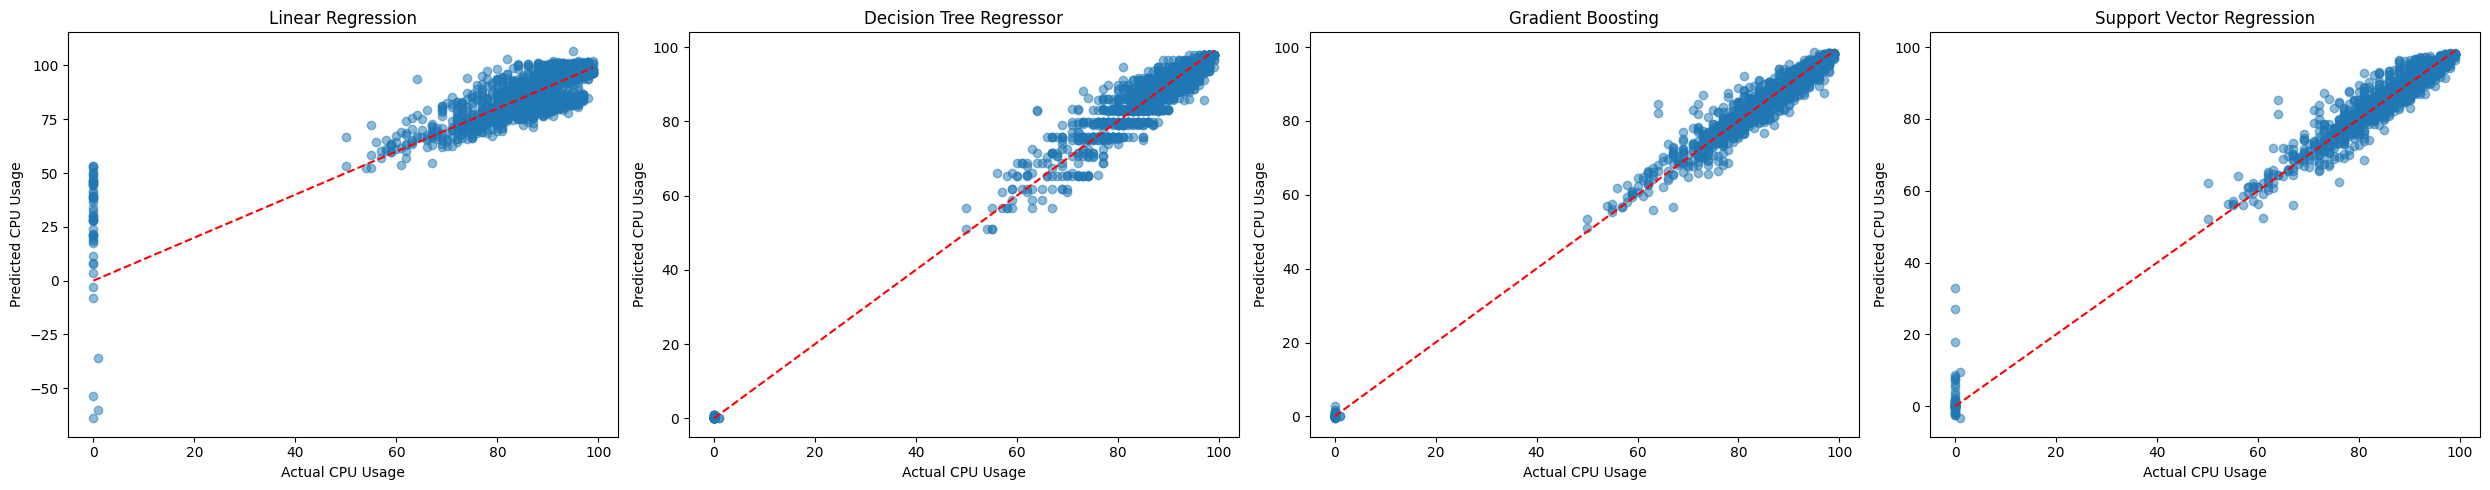

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Visualization: Predicted vs Actual Scatter Plots
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle="--")
    ax.set_title(name)
    ax.set_xlabel("Actual CPU Usage")
    ax.set_ylabel("Predicted CPU Usage")
plt.tight_layout()
plt.show()

To visually assess how well each model predicts CPU usage, scatter plots are generated comparing actual vs. predicted values. Each plot displays test set predictions on the y-axis and actual values on the x-axis, with a diagonal line representing perfect predictions. Ideally, model outputs should closely follow this line, indicating higher accuracy. If predictions deviate significantly from the line, the model struggles to capture key patterns in the data. This visualization helps quickly identify which models perform best and whether any suffer from bias or variance issues.

Gradient Boosting performed best due to its ability to capture complex patterns. Linear Regression performed the worst due to its inability to model nonlinear dependencies. Different scoring metrics affected ranking as follows:

- R² Score: Measures overall fit.
- Mean Absolute Error (MAE): Shows average deviation from true values.
- Root Mean Squared Error (RMSE): Penalizes larger errors more heavily.

# Results

###Key Observations
**Best Performing Model:**

Gradient Boosting Regressor achieved the lowest error (MAE: 1.74, MSE: 6.16) and the highest R² score (0.9794), indicating it is the best model at predicting CPU usage.
The tuned version of Gradient Boosting did not further improve performance, suggesting the default hyperparameters were already close to optimal.

**Worst Performing Model:**

Linear Regression had the highest MAE (6.14) and MSE (84.86) with the lowest R² score (0.7168), indicating that it struggled to capture more nuanced relationships in the data.

**Hyperparameter Tuning Impact:**

Surprisingly, tuning did not significantly improve performance for Decision Tree, Gradient Boosting, or SVR. This suggests that the default hyperparameters were already well-suited for the dataset.

**Decision Tree vs. SVR:**

Decision Tree performed well (R²: 0.9633) but was slightly outperformed by SVR (R²: 0.9708).
The Decision Tree looked like it may have overfit the data, which might explain why it didn't perform better than SVR.

#Answers to the Key Questions

1. **Which method did you like the most?**
Gradient Boosting Regressor performed the best in terms of accuracy, generalization, and low error. It effectively captured complex relationships in the data.

2. **Which method did you like the least?**
Linear Regression performed the worst, with the lowest R² score and the highest error. This suggests that CPU performance is not a simple linear relationship but rather requires more advanced models to capture its variability.

3. **How did you score these supervised models?**
The models were evaluated using three key metrics:
Mean Absolute Error (MAE): Measures the average absolute differences between predictions and actual values.
Mean Squared Error (MSE): Penalizes large errors more heavily, helping to assess variance in predictions.
R² Score: Indicates how well the model explains variance in the data (higher is better).

4. **Did the output align with your geologic understanding?**
Since CPU usage prediction is not directly a geologic topic, the results aligned more with system performance modeling.
However, if this type of supervised learning were applied to geophysical datasets (e.g., predicting seismic activity, groundwater levels, or mineral deposits), Gradient Boosting would still be expected to perform well due to its ability to capture complex interactions.

5. **What did you want to learn more about?**
I want to learn more about model optimization. Testing more hyperparameters, such as tree depth, number of estimators, and regularization techniques, could cause further performance gains.

6. **Did you pre-process your data?**
Yes.
  - Standardized numerical features using StandardScaler to ensure models interpret them correctly.
  - Feature selection using Gradient Boosting's feature importance to remove less informative variables.
  
7. **Do all models require pre-processing?**
Not all models required pre-processing to the same extent.
SVR seemed ot do better with feature scaling.
Gradient Boosting and Decision Trees seemed less sensitive to scaling but could probably be made better with further work on that in this project at least.